In [31]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [14]:
# import data set 
df=pd.read_csv(r'C:\Users\SDS\Downloads\concrete_data.csv')

In [15]:
# checking data set information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [16]:
# checking data set mathametical relation 
df.describe(include ='all')

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [17]:
# extrac data x and y axis 
x=df.drop(columns=['Strength'])
y=df.iloc[:,-1]
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Strength, Length: 1030, dtype: float64

In [21]:
# creating a model object 
lr=LinearRegression()

In [24]:
# data train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_test

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
31,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7
136,389.9,189.0,0.0,145.9,22.0,944.7,755.8,28
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3
918,145.0,0.0,179.0,202.0,8.0,824.0,869.0,28
...,...,...,...,...,...,...,...,...
482,446.0,24.0,79.0,162.0,11.6,967.0,712.0,56
545,255.0,0.0,0.0,192.0,0.0,889.8,945.0,28
110,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,7
514,424.0,22.0,132.0,168.0,8.9,822.0,750.0,56


In [28]:
# apply model without PowerTransform
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('r2_score:',r2_score(y_test,y_pred))



r2_score: 0.6275531792314846


In [29]:
# cross_val_score 
np.mean(cross_val_score(lr,x_train,y_train,scoring='r2',cv=10))

0.5894185601991604

In [37]:
# creat object of Power Transformer 
pt=PowerTransformer(method='box-cox')


In [38]:
# apply boxcox in data 
x_train_transformed=pt.fit_transform(x_train+0.0001)# here have some row is 0 so we add some value 
x_test_transformed=pt.transform(x_test+0.0001)# here have some row is 0 so we add some value 


In [39]:
# model training with box-cox transform 
lr.fit(x_train_transformed,y_train)
y_pred2=lr.predict(x_test_transformed)
print('r2_score:',r2_score(y_test,y_pred2))

r2_score: 0.8063539926712572


In [40]:
# cross val score 
np.mean(cross_val_score(lr,x_train_transformed,y_train,scoring='r2',cv=10))

0.7917800515454603

In [50]:
df1=pd.DataFrame(x_train_transformed,columns=x_train.columns)
df2=pd.DataFrame(x_test_transformed,columns=x_test.columns)
# merge two data set 
df3=pd.concat([df1,df2],ignore_index=True)
df3
print(df1.shape,df2.shape,df3.shape)

(824, 8) (206, 8) (1030, 8)


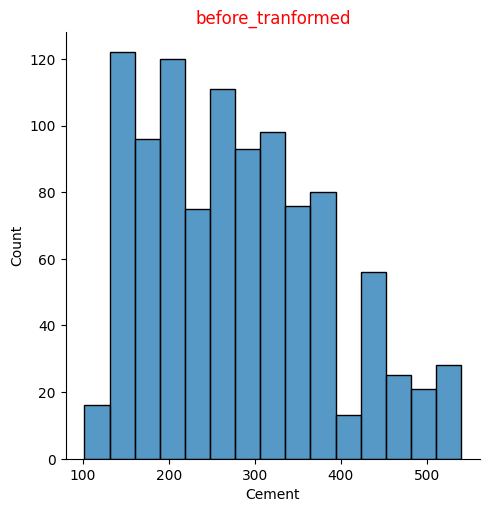

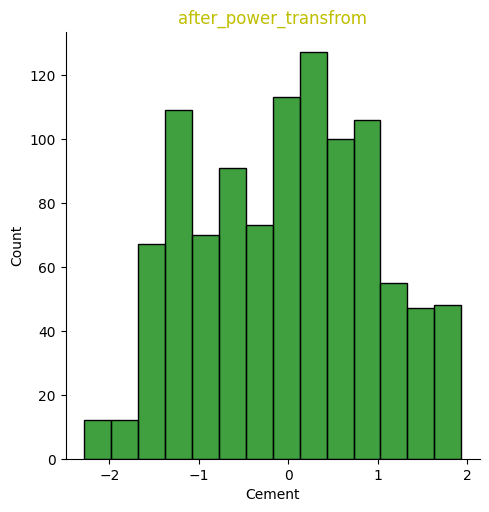

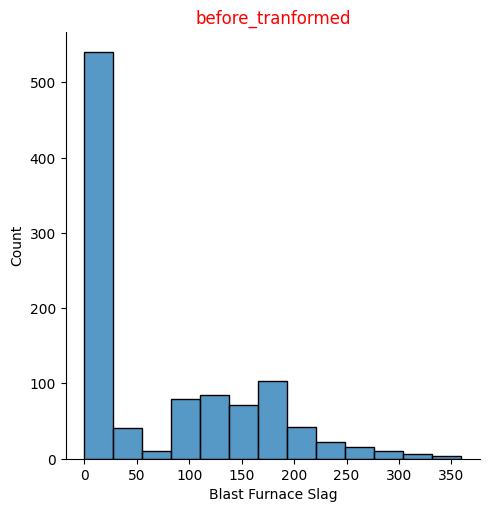

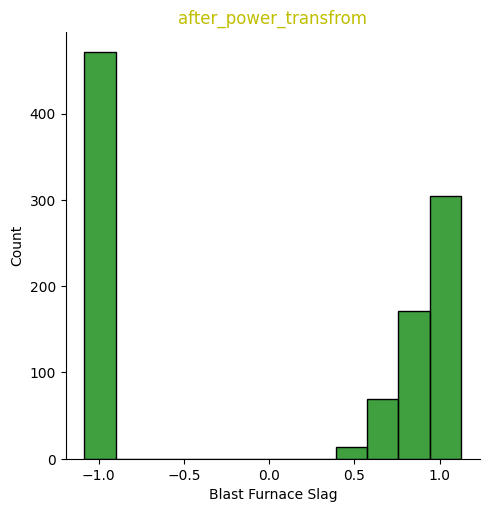

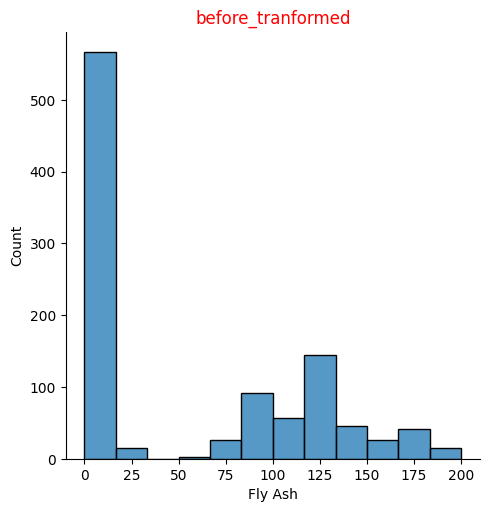

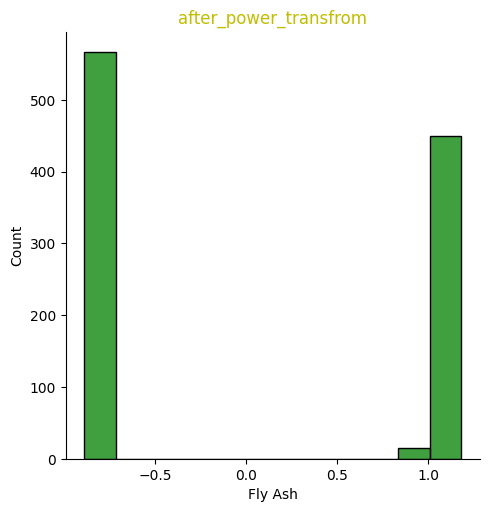

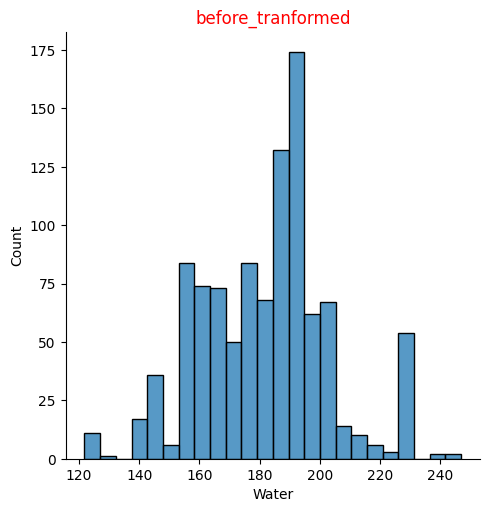

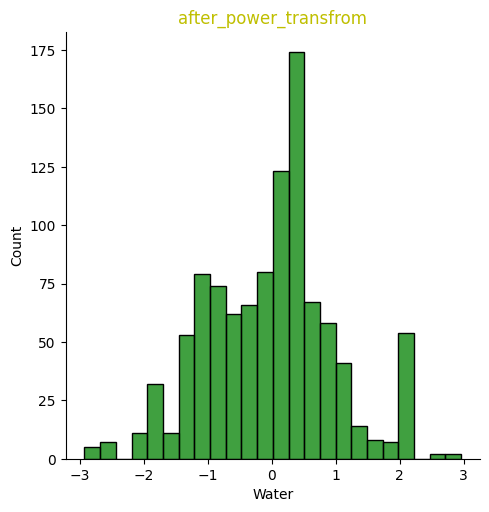

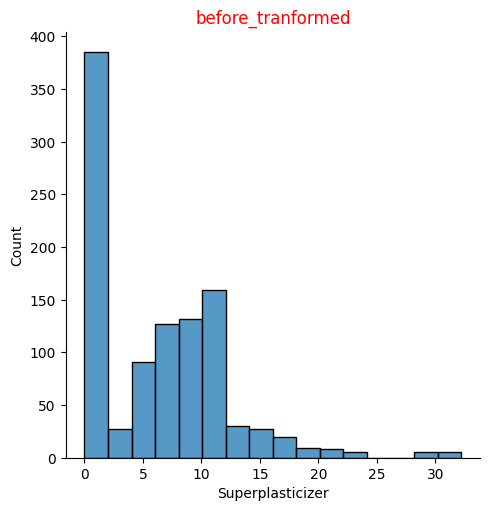

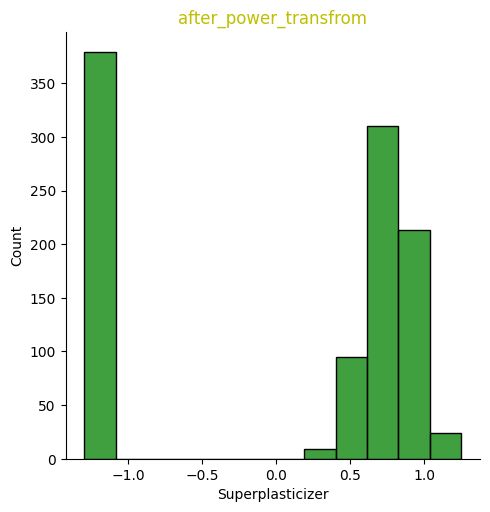

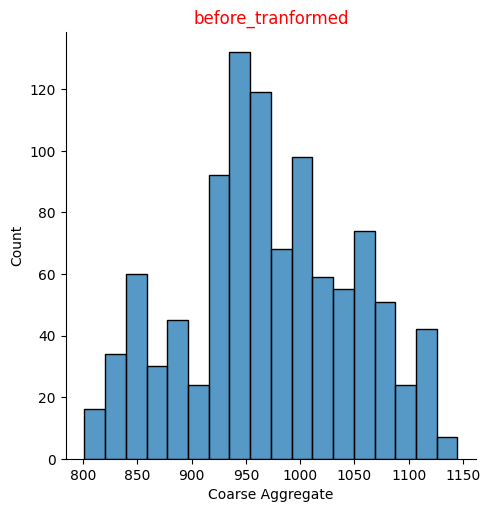

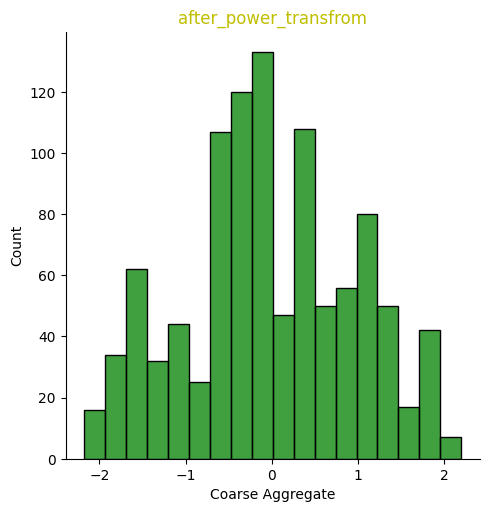

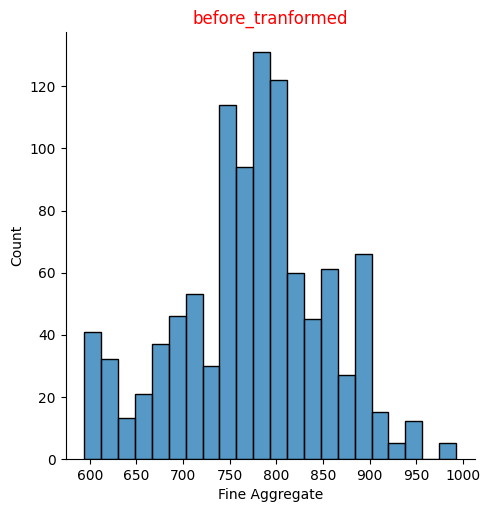

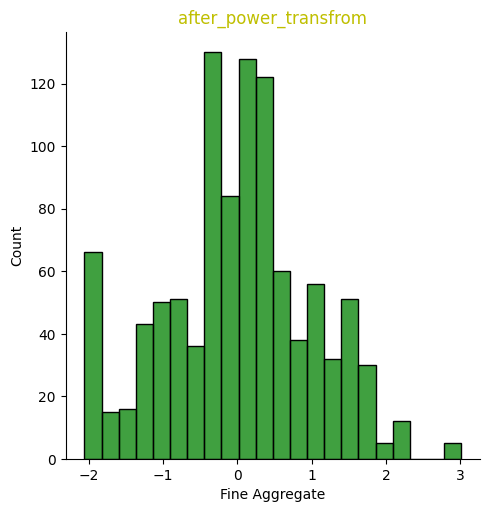

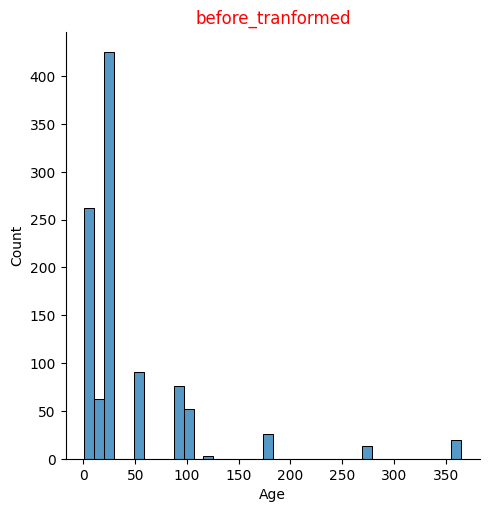

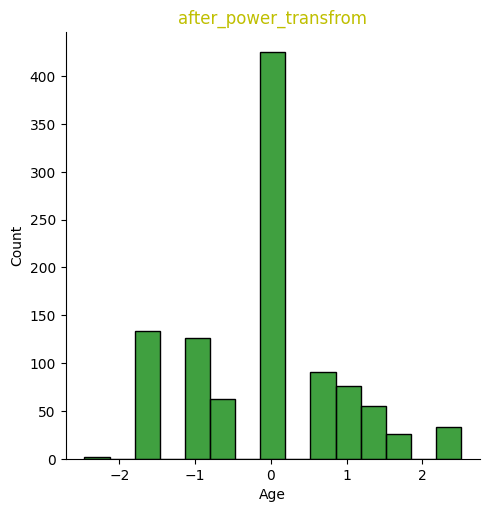

In [56]:
for col in df3.columns:
    sns.displot(x[col])
    plt.title('before_tranformed',c='red')

    sns.displot(df3[col],color='green')
    plt.title('after_power_transfrom',color='y')
    plt.show()

In [57]:
pt.lambdas_

array([ 0.1770251 ,  0.03105072, -0.0520191 ,  0.77268134,  0.13396773,
        1.12981322,  1.78201837,  0.06662591])

In [58]:
pd.DataFrame({'columns':x.columns,'lambda_value':pt.lambdas_})

,columns,lambda_value
0,Cement,0.177025
1,Blast Furnace Slag,0.031051
2,Fly Ash,-0.052019
3,Water,0.772681
4,Superplasticizer,0.133968
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066626
